## Encoding

### 1. Importamos las librerías necesarias.

In [4]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Herramientas para la Visualización
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

# Codificación de las variables numéricas
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Abrimos el archivo con el que vamos a trabajar.

In [2]:
df = pd.read_csv("../archivos/bikes_stand.csv", index_col = 0)
df.head(2)

,fecha,estacion,año,mes,dia_semana,dias_festivos,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis
0,2018-01-01,invierno,0,1,lunes,New Year's Day,-0.486274,0.855582,-0.208909,331,654,985
1,2018-01-02,invierno,0,1,martes,No Festivo,-0.425690,0.332722,0.687550,131,670,801


### 3. Orden e importancia de las variables que queremos codificar.

- fecha: tenemos la información de los días en otras columnas más específicas, por lo que no vamos a utilizarla para la predicción.
- estación: 
- año:
- mes:
- dia_semana:
- dias_festivos:

In [ ]:
plt.rcParams["figure.figsize"] = (16,8)

In [25]:
df_estaciones = pd.DataFrame(df.groupby(df['estacion'])['total_bicis'].sum())

In [30]:
df_estaciones.reset_index(inplace=True)

<AxesSubplot:xlabel='estacion', ylabel='total_bicis'>

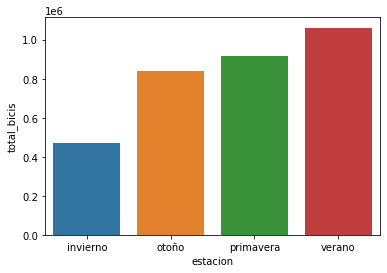

In [32]:
sns.barplot(y= 'total_bicis', x= 'estacion', data= df_estaciones)